# Rader Graph Plot

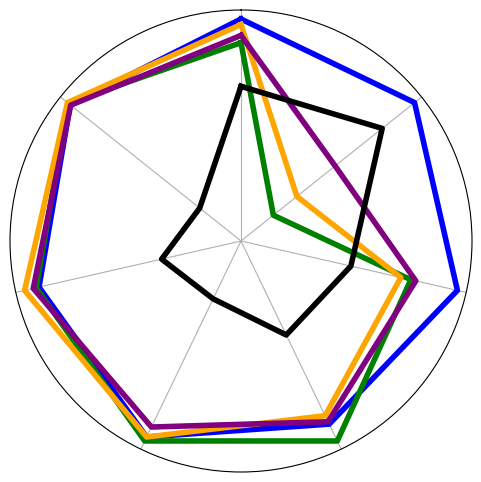

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the categories (datasets) and angles for the radar chart
categories = ['Weather', 'Traffic', 'Electricity', 'ETTh1', 'ETTh2', 'ETTm1', 'ETTm2']
categories_ = ['', '', '', '', '', '', '']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Model MAE values
# You can add your own model performance
# low_mea should be numerically larger than the other models.
# The value added at the end is the minimum value of the model's metrics across all datasets

iTransformer_mae = [0.278, 0.282, 0.270, 0.448, 0.407, 0.410, 0.332] + [0.278]
RLinear_mae = [0.291, 0.378, 0.298, 0.434, 0.399, 0.408, 0.327] + [0.291]
PatchTST_mae = [0.281, 0.362, 0.304, 0.455, 0.407, 0.400, 0.326] + [0.281]
TimesNet_mae = [0.287, 0.336, 0.295, 0.450, 0.427, 0.406, 0.333] + [0.287]
Crossformer_mae = [0.315, 0.304, 0.334, 0.522, 0.684, 0.495, 0.611] + [0.315]
low_mae = [0.4, 0.4, 0.4, 0.6, 0.8, 0.55, 0.7] + [0.4]

# Normalize and reverse the MAE values for each dataset individually
mae_matrix = np.array([
    iTransformer_mae[:-1],
    RLinear_mae[:-1],
    PatchTST_mae[:-1],
    TimesNet_mae[:-1],
    Crossformer_mae[:-1],
    low_mae[:-1],
])

mae_min = mae_matrix.min(axis=0)
mae_max = mae_matrix.max(axis=0)

# Reverse scale: smaller MAE should be further from the center
reversed_mae_matrix = (mae_max - mae_matrix) / (mae_max - mae_min)

# Add closing value to close the radar chart
reversed_model_1 = list(reversed_mae_matrix[0]) + [reversed_mae_matrix[0, 0]]
reversed_model_2 = list(reversed_mae_matrix[1]) + [reversed_mae_matrix[1, 0]]
reversed_model_3 = list(reversed_mae_matrix[2]) + [reversed_mae_matrix[2, 0]]
reversed_model_4 = list(reversed_mae_matrix[3]) + [reversed_mae_matrix[3, 0]]
reversed_model_5 = list(reversed_mae_matrix[4]) + [reversed_mae_matrix[4, 0]]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Rotate the plot by 90 degrees to make the bottom edge horizontal
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Plot the models with reversed scaling
ax.plot(angles, reversed_model_1, linewidth=4, linestyle='solid', label='iTransformer', color='blue')
ax.plot(angles, reversed_model_2, linewidth=4, linestyle='solid', label='RLinear', color='green')
ax.plot(angles, reversed_model_3, linewidth=4, linestyle='solid', label='PatchTST', color='orange')
ax.plot(angles, reversed_model_4, linewidth=4, linestyle='solid', label='TimesNet', color='purple')
ax.plot(angles, reversed_model_5, linewidth=4, linestyle='solid', label='Crossformer', color='black')

# # Annotate the data points for Timba with original (non-normalized) MAE values
# for i, (angle, mae) in enumerate(zip(angles[:-1], Timba_mae[:-1])):
#     ax.text(angle, reversed_model_1[i] + 0.05, f'{mae:.3f}', color='red', fontsize=10, ha='center')

# # Add labels for each dataset on the axes
ax.set_xticks(angles[:-1])
# ax.set_xticklabels(categories)
ax.set_xticklabels(categories_)

# Remove the radial grid lines (tick marks)
ax.yaxis.set_visible(False)

# # Display the legend outside the plot
# ax.legend(loc='center', bbox_to_anchor=(0.1, 0.1))

# Set the title and display the plot
# plt.title('Model Comparison with Reversed MAE (Best at Outer Edge)')
plt.savefig(" radar.png", bbox_inches='tight',dpi=600)
plt.show()
# Save the figure

